In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1. Load the data into the pandas environment and identify some basic details of the dataset

In [2]:
dt=pd.read_csv('employee.csv')

In [3]:
dt

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


2. Reset the index as "name".


In [4]:
dt.set_index('name',inplace=True)

In [5]:
dt

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


3. Select rows for specific names Jack Morgan and Josh wills.


In [6]:
dt.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


4. Select data for multiple values "Sales" and “Finance”.


In [7]:
dt[dt['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


5. Display employee who has more than 700 performance score.


In [8]:
dt[dt['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


6. Display employee who has more than 500 and less than 700 performance score


In [9]:
dt[(dt['performance_score']>500)&(dt['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


7. Check and handle missing values in the dataset.


In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 804.0+ bytes


In [11]:
dt.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [12]:
dt.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

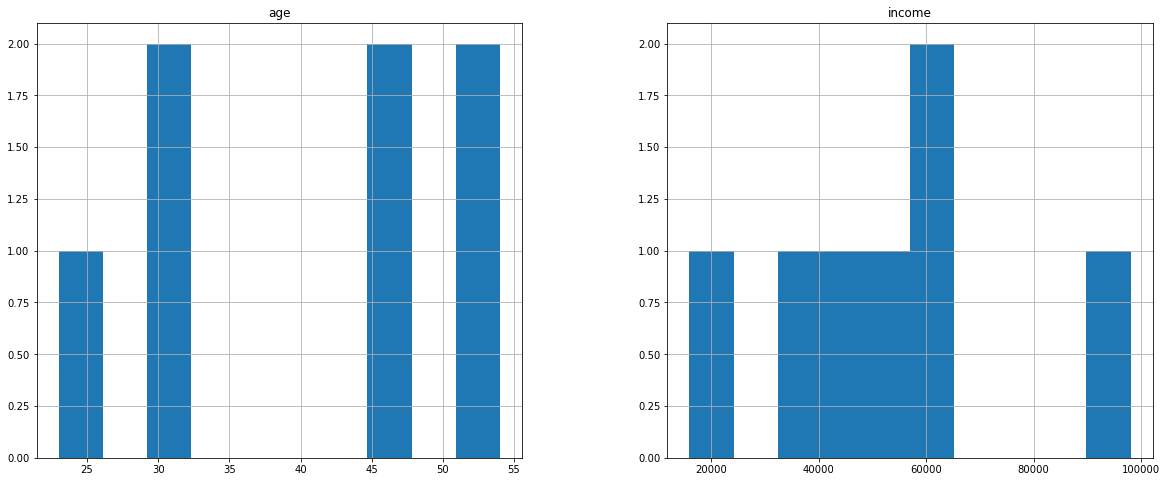

In [13]:
f=dt.select_dtypes(include='float')
f.hist(figsize=(20,8))
plt.show()

In [14]:
for i in ['age','income']:
    dt[i]= dt[i].fillna(dt[i].mean())
dt=dt.round()

In [15]:
dt

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.0,NaN,Operations,G3,723
S Kumar,40.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,40.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52857.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


8. Check the outliers and handle outliers in performance score using Percentiles.


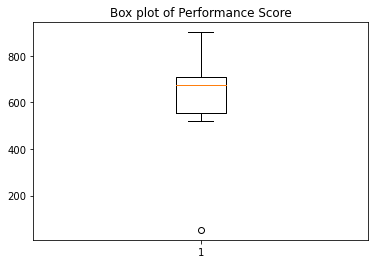

In [16]:
plt.boxplot(dt['performance_score'])
plt.title('Box plot of Performance Score')
plt.show()

In [17]:
Q1=np.percentile(dt['performance_score'], 25, interpolation='midpoint')
Q1

556.0

In [18]:
Q2=np.percentile(dt['performance_score'], 50, interpolation='midpoint')
Q2

674.0

In [19]:
Q3=np.percentile(dt['performance_score'], 75, interpolation='midpoint')
Q3

711.0

In [20]:
IQR=Q3-Q1
IQR

155.0

In [21]:
low_limit=Q1-1.5*IQR
low_limit

323.5

In [22]:
upper_limit=Q3+1.5*IQR
upper_limit

943.5

In [23]:
d=dt[(dt['performance_score']<low_limit)|(dt['performance_score']>upper_limit)]    

In [24]:
dt.drop(d.index, inplace=True)
dt

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.0,NaN,Operations,G3,723
S Kumar,40.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,40.0,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [25]:
dt.shape

(8, 6)

9. Check the gender column and do Dummy encoding.


In [26]:
d=pd.get_dummies(dt,columns=['gender'])
d

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.0,Operations,G3,723,0,0
S Kumar,40.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,40.0,62000.0,Sales,G3,649,0,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


10.Do the standard scaling on the feature performance score.

In [27]:
from sklearn import preprocessing

In [28]:
pre = pd.DataFrame(d['performance_score'])
st = preprocessing.StandardScaler()
pre = st.fit_transform(pre)
pre = pd.DataFrame(pre)
pre.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
